## Lógica Computacional: 25/26
---
## TP1 - Ex1

$Grupo$ $05$ 

*   Vasco Ferreira Leite (A108399)
*   Gustavo da Silva Faria (A108575)
*   Afonso Henrique Cerqueira Leal (A108472)
---


Exercício 1

Este problema usa optimização MIP (“Mixed Integer Programming” (OrTools) e representação por  Grafos ( NetworkX).

1. Para um distribuidor de encomendas o seu território está organizados em pontos (“nodes”) de fornecimento (“sources”), pontos de passagem  e pontos de entrega (“sinks”) ligados por vias de comunicação (“edges”) bidirecionais cada uma das quais associada uma capacidade em termos do número de veículos de transporte que suporta.
2. Os items distribuidos estão organizados em “pacotes” de três tipos “standard” : uma unidade, duas unidades e cinco unidades. Os pacotes são transportados em veículos todos com a capacidade de 10 unidades. Cada ponto de entrega tem um limite no número total de unidades que tem em “stock” e um limite no número de veículos que dispõe.
3. Cada encomenda é definida por o identificador do ponto de entrega e pelo número de pacotes, de cada um dos tipos, que devem ser entregues nesse ponto.
4. O objetivo do problema é decidir, a partir de uma encomenda e com um mínimo no número de veículos:

        Em cada ponto de entrega,  se estará envolvido no fornecimento de unidades que essa encomenda requer sem violar os limites do seu “stock”.

        Em cada ponto de entrega,   como empacotar as unidades disponíveis, de acordo com a encomenda”,  e como as distribuir por veículos,

        Em cada veículo, qual o percurso a seguir até  ao ponto de entrega; para cada via ao longo de cada percurso, o total de veículos não pode exceder a capacidade dessa via.

Encomenda com o nome do ponto de entrega e numero de pacotes de cada tipo


## Resulução

Para resolver este problema é utilizado, devido as limitações do NetworkX, um grafo direcionado, no qual:

 Os nodos tem um atributo 'Type' que permite as distinção entre pontos de fornecimento, passagem e entrega. No caso dos pontos de fornecimento têm támbem um atributo 'stock' e 'veiculos'
 
 As arestas tem um atributo 'capacity' que representa o limite no número máximo de veículos que transporte que suporta

 x - id do ponto de entrega
 nSmall - numero de pacotes de 1 unidade
 nMedium - numero de pacotes de 2 unidades
 nLarge - numero de pacotes de 5 unidades

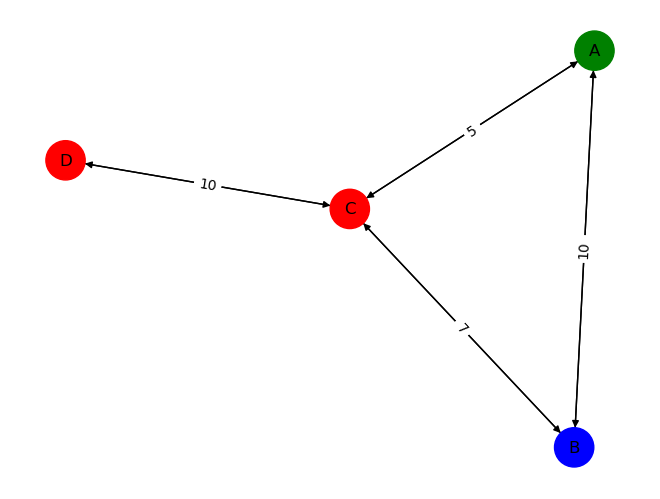

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Isto são merdas so para ter ideia do que temos de fazer com o grafo

# Grafo direcionado porque acho que a merda do prog n tem funções para o normal
G = nx.DiGraph()

G.add_node('A', type='source', color='green')
G.add_node('B', type='passagem', color='blue')
G.add_node('C', type='sink', color='red', stock='10', veiculos='4')
G.add_node('D', type='sink', color='red', stock='7', veiculos='5')

# Temos de por em ambas os sentidos por que é diGrafo
G.add_edge('A', 'B', capacity=10)
G.add_edge('B', 'A', capacity=10)

G.add_edge('B', 'C', capacity=7)
G.add_edge('C', 'B', capacity=7)

G.add_edge('C', 'D', capacity=10)
G.add_edge('D', 'C', capacity=10)

G.add_edge('A', 'C', capacity=5)
G.add_edge('C', 'A', capacity=5)

# Sacar as cores e imprimir o grafo
node_colors = [G.nodes[n]['color'] for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800)

# Adicionar rótulos de capacidade nas arestas
edge_labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()